<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/Used_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
from google.colab import files
url = 'https://raw.githubusercontent.com/nabilbeit/McGill/main/Toyota_Used_Cars_.csv'
df = pd.read_csv(url)
print(df.head(10))


   Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel   90         1          0  2000      3    1165   
1  13750   23  72937   Diesel   90         1          0  2000      3    1165   
2  13950   24  41711   Diesel   90         1          0  2000      3    1165   
3  14950   26  48000   Diesel   90         0          0  2000      3    1165   
4  13750   30  38500   Diesel   90         0          0  2000      3    1170   
5  12950   32  61000   Diesel   90         0          0  2000      3    1170   
6  16900   27  94612   Diesel   90         1          0  2000      3    1245   
7  18600   30  75889   Diesel   90         1          0  2000      3    1245   
8  21500   27  19700   Petrol  192         0          0  1800      3    1185   
9  12950   23  71138   Diesel   69         0          0  1900      3    1105   

   Mileage  
0    29196  
1    45321  
2    25918  
3    29826  
4    23923  
5    37904  
6    58789  
7    47155  
8 

In [122]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 1198
Number of Columns: 11


In [123]:
category = len(df.select_dtypes(include=['object']).columns)
number = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', category, 'categorical', '+',
      number, 'numerical', '=', category+number, 'features')


Total Features:  1 categorical + 10 numerical = 11 features


In [124]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
Mileage       int64
dtype: object

In [ ]:
print(df.isnull().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
Mileage      0
dtype: int64


In [ ]:
df["KM"].value_counts().sort_values()

47171    1
37400    1
37177    1
36544    1
33511    1
        ..
45000    6
36000    7
43000    7
59000    7
1        7
Name: KM, Length: 1068, dtype: int64

In [125]:
data_corr = df.corr()
data_corr

<ipython-input-125-1da0fe627a23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage
Price,1.000000,-0.877162,-0.625744,0.358160,0.121731,0.056805,0.142579,0.181321,0.575385,-0.625744
Age,-0.877162,1.000000,0.605178,-0.204268,-0.122013,-0.001329,-0.097737,-0.146070,-0.460701,0.605178
KM,-0.625744,0.605178,1.000000,-0.364532,-0.099636,-0.074100,0.309856,-0.049595,-0.041041,1.000000
HP,0.358160,-0.204268,-0.364532,1.000000,0.062693,0.037744,-0.020446,0.075380,0.066146,-0.364532
MetColor,0.121731,-0.122013,-0.099636,0.062693,1.000000,-0.019658,0.021566,0.083692,0.052818,-0.099635
Automatic,0.056805,-0.001329,-0.074100,0.037744,-0.019658,1.000000,-0.051455,-0.007032,0.065416,-0.074100
CC,0.142579,-0.097737,0.309856,-0.020446,0.021566,-0.051455,1.000000,0.111101,0.642878,0.309855
Doors,0.181321,-0.146070,-0.049595,0.075380,0.083692,-0.007032,0.111101,1.000000,0.285150,-0.049595
Weight,0.575385,-0.460701,-0.041041,0.066146,0.052818,0.065416,0.642878,0.285150,1.000000,-0.041042
Mileage,-0.625744,0.605178,1.000000,-0.364532,-0.099635,-0.074100,0.309855,-0.049595,-0.041042,1.000000


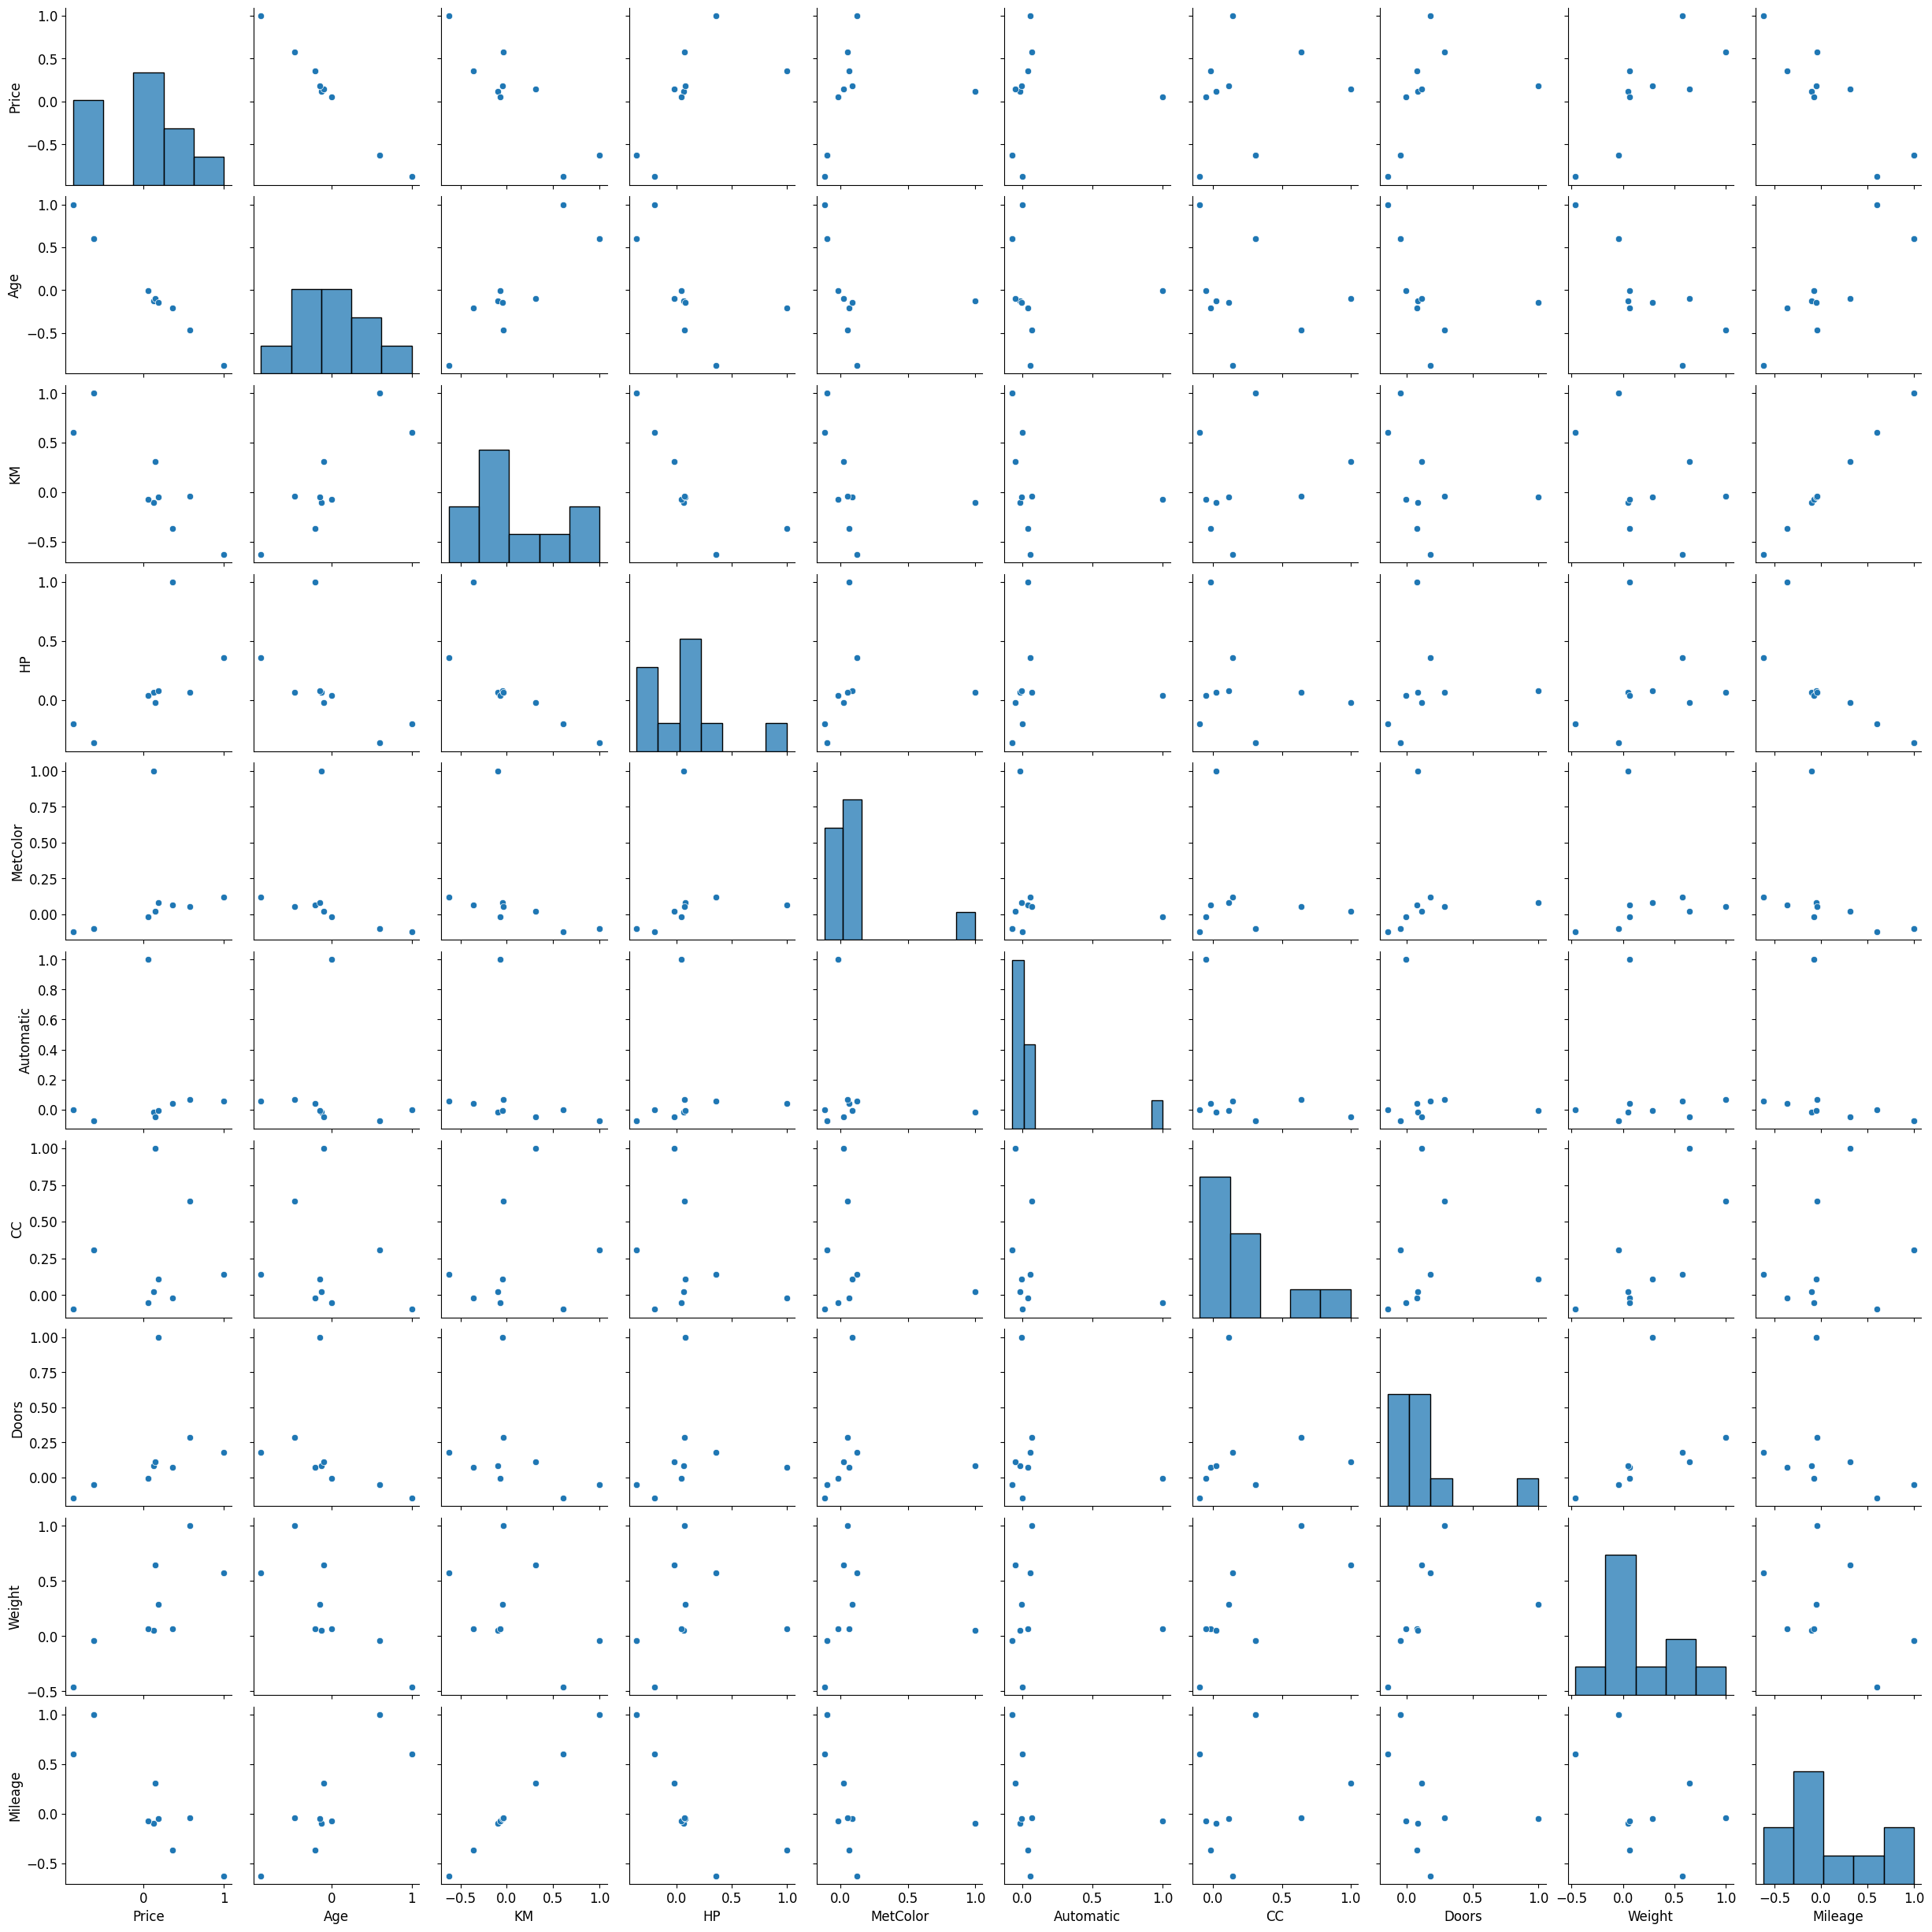

In [ ]:
sns.pairplot(data_corr)

<ipython-input-85-882cb0e7b8b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


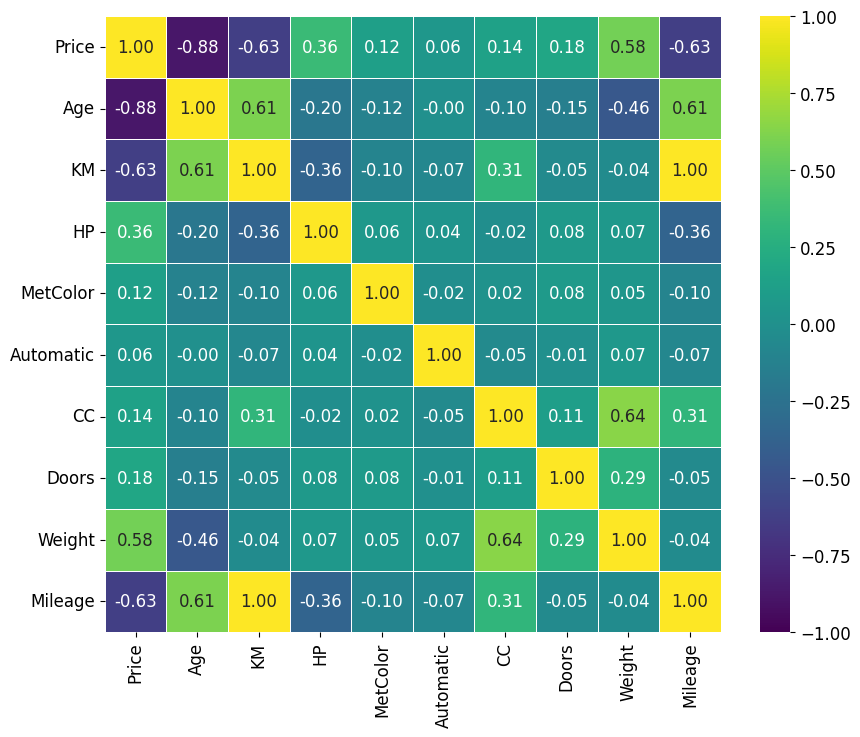

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,11243.260434,52.088481,69221.795492,101.343072,0.678631,0.048414,1576.191987,4.064274,1076.470785,43012.429048
std,3743.745345,17.951960,40363.040114,15.575509,0.467197,0.214729,192.441556,0.956030,55.531205,25080.404751
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000,1.000000
25%,8950.000000,41.000000,39458.250000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000,24518.000000
50%,10250.000000,56.000000,61988.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000,38518.000000
75%,12450.000000,65.000000,93059.250000,110.000000,1.000000,0.000000,1600.000000,5.000000,1100.000000,57824.750000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000,150993.000000


In [126]:
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
df1 = df.drop("FuelType", axis=1)
scale_columns =  ['Age','KM','HP','CC','Weight']
features_to_scale = df1.loc[:,scale_columns]
features_to_scale = MinMaxScaler().fit_transform(features_to_scale.values)

df1_scaled = df1.copy() #Copy it to not overwrite it
df1_scaled[scale_columns]=features_to_scale
df1_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1198 non-null   int64  
 1   Age        1198 non-null   float64
 2   KM         1198 non-null   float64
 3   HP         1198 non-null   float64
 4   MetColor   1198 non-null   int64  
 5   Automatic  1198 non-null   int64  
 6   CC         1198 non-null   float64
 7   Doors      1198 non-null   int64  
 8   Weight     1198 non-null   float64
 9   Mileage    1198 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 93.7 KB


In [127]:
# get_dummies() is a Pandas function performs one-hot encoding
df = pd.get_dummies(df)
df.head()
# one-hot encoding helps prevent
# from assuming any ordinal relationship between
# categories and ensures that each category is treated independently.

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,29196,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,45321,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,25918,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,29826,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,23923,0,1,0


In [181]:
x_train = df.drop(columns=['price'])
y_train = df['price']

In [183]:
# Normalizing the Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


x = StandardScaler().fit_transform(df)
x_train_scale = df.drop(columns=['price'])
y_train_scale = df['price']
pd.DataFrame(x_train_scale, columns=x_train.columns).head()

,Age,KM,HP,MetColor,CC,Doors,Weight,Mileage
0,-1.621028,-0.551125,-0.728567,0.688153,2.203188,-1.113687,1.594890,-0.551115
1,-1.621028,0.092083,-0.728567,0.688153,2.203188,-1.113687,1.594890,0.092085
2,-1.565300,-0.681868,-0.728567,0.688153,2.203188,-1.113687,1.594890,-0.681870
3,-1.453845,-0.525993,-0.728567,-1.453165,2.203188,-1.113687,1.594890,-0.525986
4,-1.230936,-0.761455,-0.728567,-1.453165,2.203188,-1.113687,1.684968,-0.761447


In [173]:
# Partition the dataset into training and testing sets

x = scaledData.drop(columns=['Price'])
y = scaledData['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [171]:
# Linear Regression Model

lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
score = lr.score(x_test,y_test)
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error (MSE): {mse}")
print('R Square Score: ', score)
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")


Mean Squared Error (MSE): 1481391.204745125
R Square Score:  0.8609723936619347
Coefficients: [-2.25390092e+03 -6.72725573e+06  5.37255637e+02  5.33041756e+01
 -1.95112274e+02 -4.40084995e+01  1.19185617e+03  6.72658748e+06]
Intercept: 11245.58816871356


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.9 MB/s eta 0:00:00


Mean Squared Error (MSE): 1481391.204745125
R Square Score:  0.8609723936619347
Coefficients: [-2.25390092e+03 -6.72725573e+06  5.37255637e+02  5.33041756e+01
 -1.95112274e+02 -4.40084995e+01  1.19185617e+03  6.72658748e+06]
Intercept: 11245.58816871356


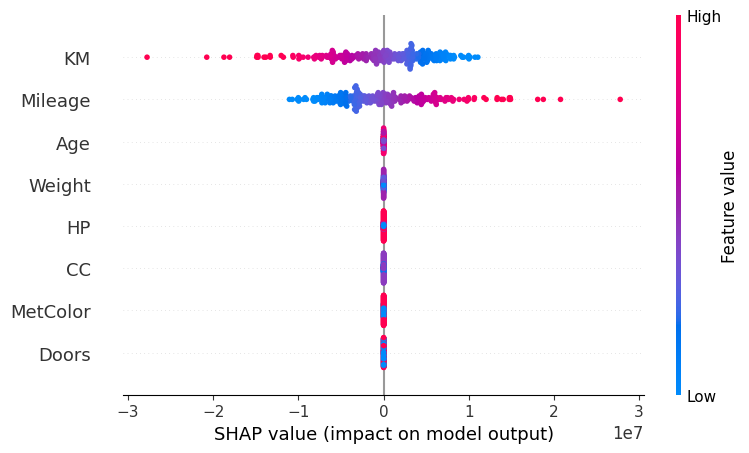

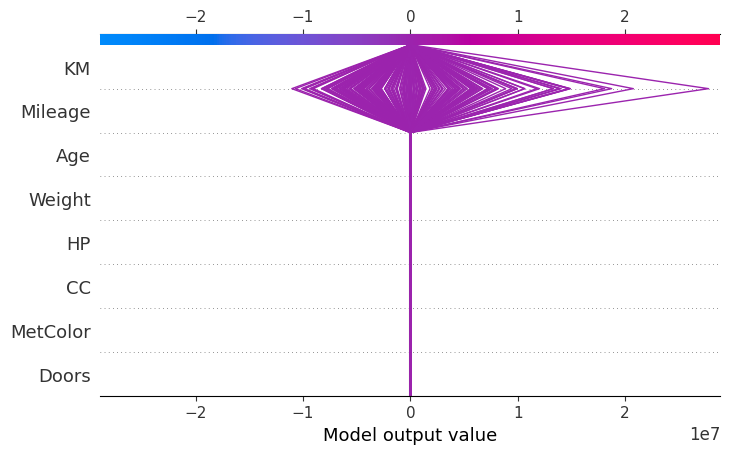

In [170]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Your existing code
data = dfSelected.drop(columns=['Price'])
target = dfSelected['Price']
x = StandardScaler().fit_transform(data)
scaledData = pd.DataFrame(x, columns=data.columns)
scaledData['Price'] = target
x = scaledData.drop(columns=['Price'])
y = scaledData['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
score = lr.score(x_test,y_test)
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error (MSE): {mse}")
print('R Square Score: ', score)
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

# Compute Shapley values
explainer = shap.Explainer(lr, x_train)
shap_values = explainer(x_test)

# Summarize the Shapley values in a plot
shap.summary_plot(shap_values, x_test)

shap.decision_plot(explainer.expected_value, shap_values.values, x_test)

